# HOUSING PRICE PREDICTION

## 1. Import Required Libraries and Read Dataset

In [1]:
import numpy as np
import pandas as pd
import os
from pandas import read_csv
import matplotlib.pyplot as plt
import seaborn as sns

column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## 2. Data Exploration

In [2]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [3]:
print(np.shape(data))# Dimension of the dataset

(506, 14)


In [4]:
# Summarize the data to see the distribution of data
print(data.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

In [5]:
data.info() # Concise summary of a DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [6]:
data.isnull().sum() #cheaking null value in the data frame

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

## 3. Data Visualization and Analysis

#### Box plot with Hyper parameter tuning

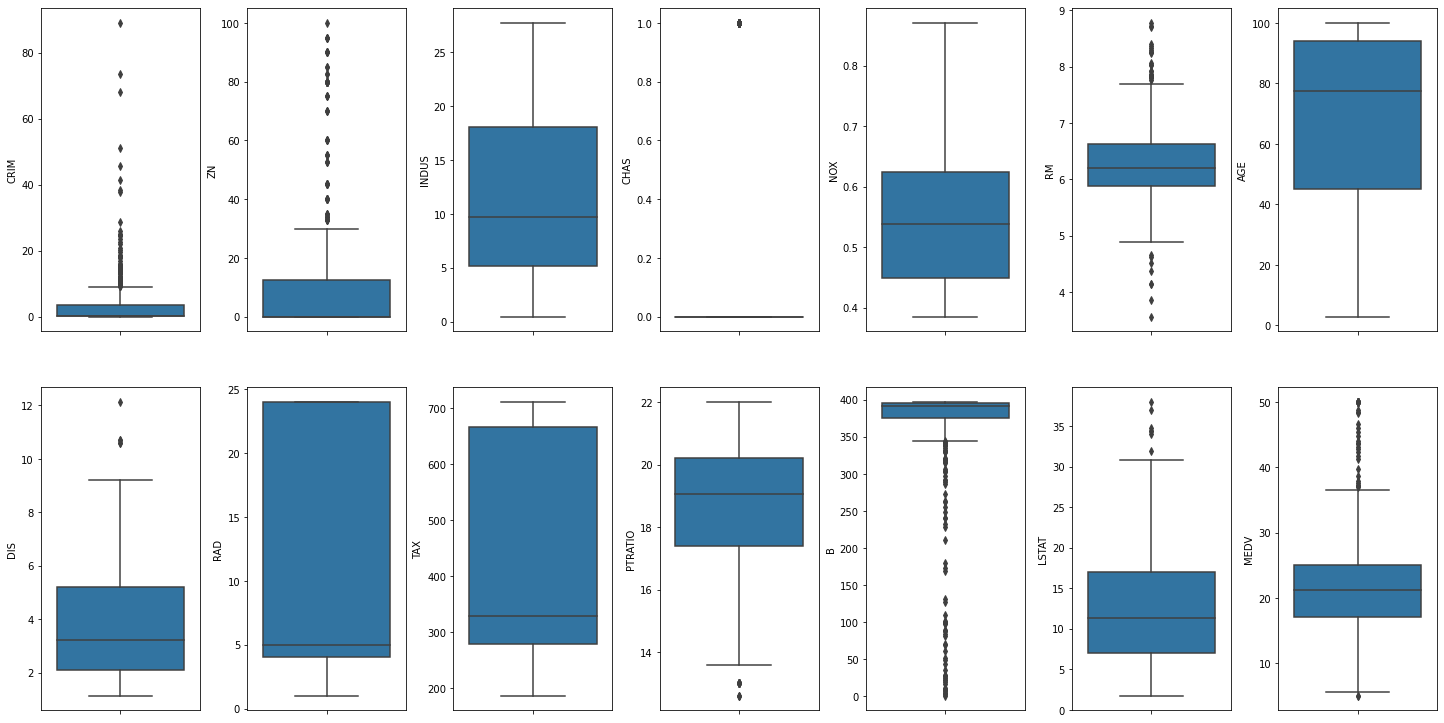

In [7]:
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col,value in data.items():
    sns.boxplot(y=col, data=data, ax=ax[index])
    index +=1
    
#hyper parameter tuning
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

#### Hist Plot with Hyper parameter tuning

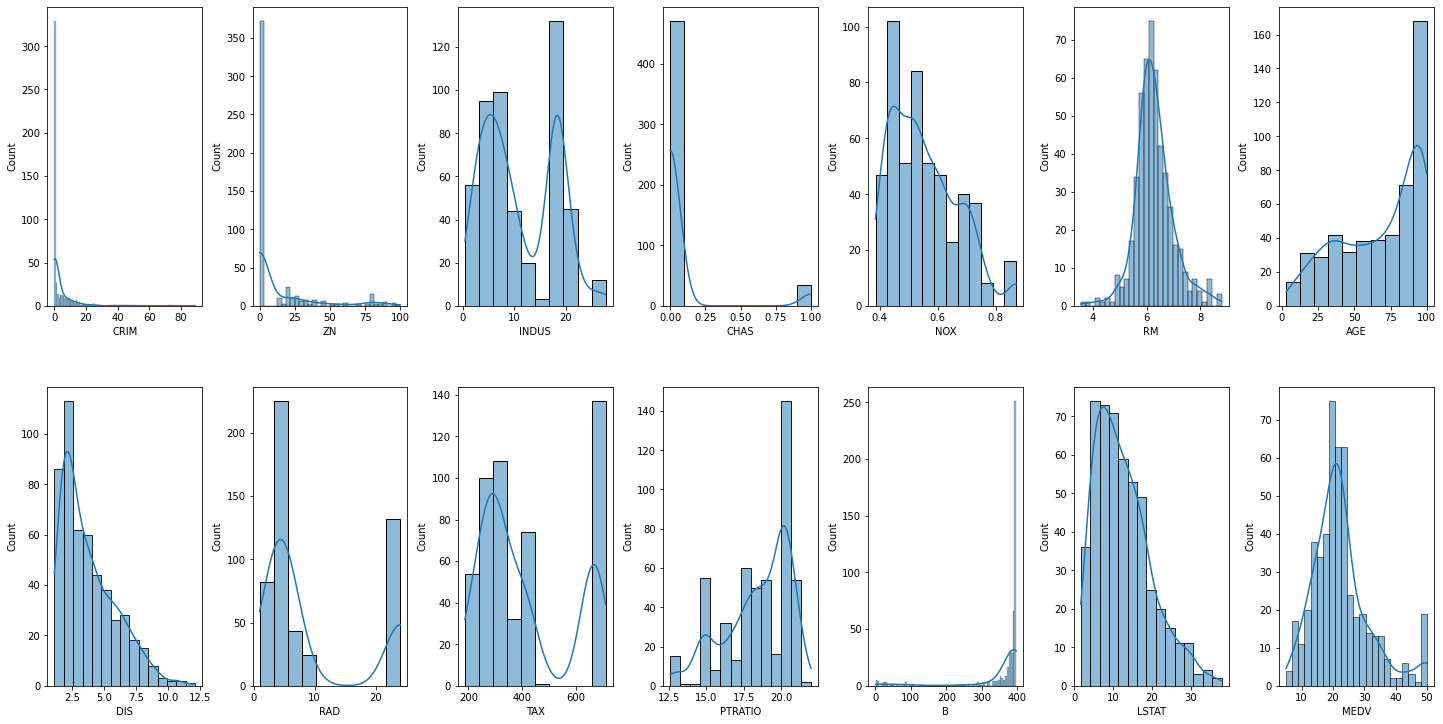

In [8]:
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col,value in data.items():
    sns.histplot(value, kde=True, ax=ax[index])
    index +=1
#hyper parameter tuning
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

#### Max-Min Normalization

In [9]:
cols = ['CRIM','ZN','TAX','B'] 
for col in cols:
    #finding minimum and maximum of that columns
    minimum = min(data[col])
    maximum = max(data[col])
    data[col]=(data[col]-minimum)/(maximum - minimum)

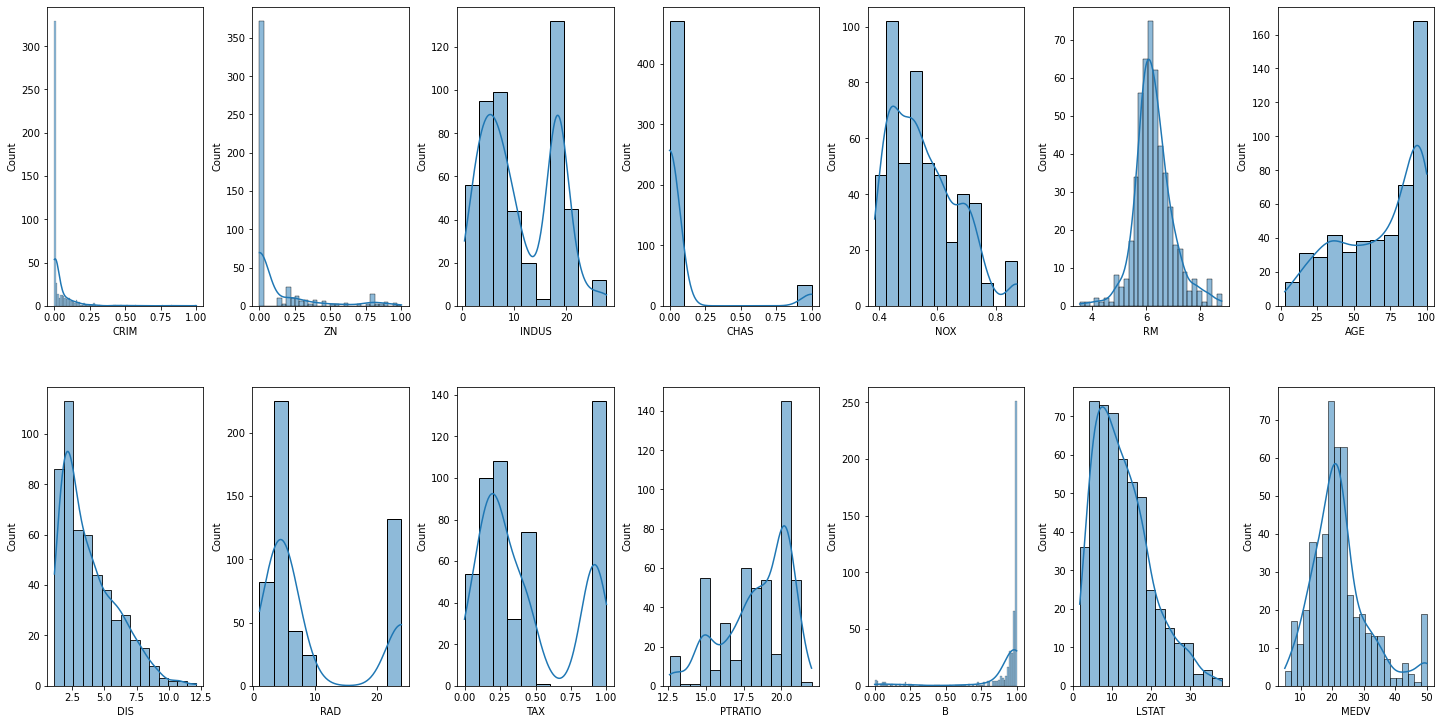

In [10]:
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col,value in data.items():
    sns.histplot(value, kde=True, ax=ax[index])
    index +=1
#hyper parameter tuning
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

#### Standardize the Data

In [11]:
from sklearn import preprocessing
scalar = preprocessing.StandardScaler()

#fit out data
scaled_cols = scalar.fit_transform(data[cols])
scaled_cols = pd.DataFrame(scaled_cols,columns =cols)
scaled_cols.head()

,CRIM,ZN,TAX,B
0,-0.419782,0.284830,-0.666608,0.441052
1,-0.417339,-0.487722,-0.987329,0.441052
2,-0.417342,-0.487722,-0.987329,0.396427
3,-0.416750,-0.487722,-1.106115,0.416163
4,-0.412482,-0.487722,-1.106115,0.441052


In [12]:
for col in cols:
    data[col]=scaled_cols[col]

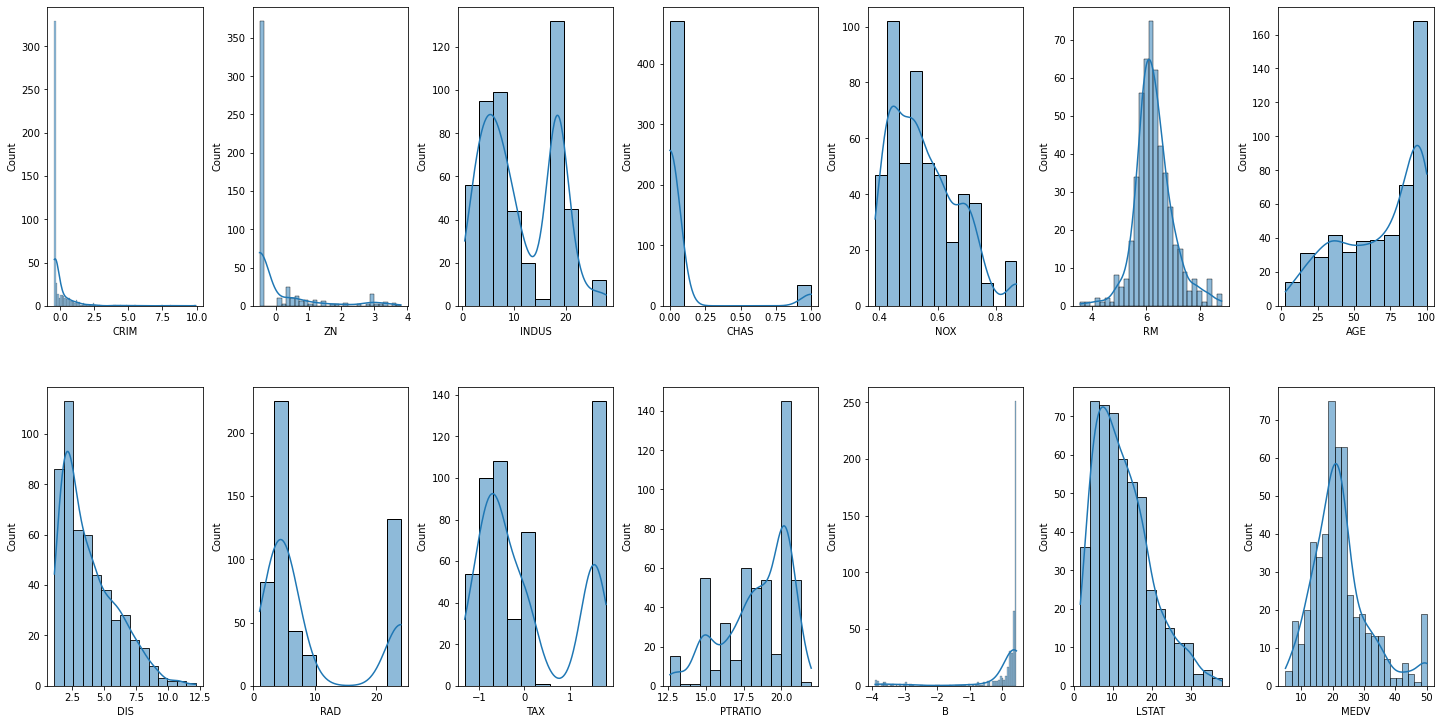

In [13]:
#hist plot
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col,value in data.items():
    sns.histplot(value, kde=True, ax=ax[index])
    index +=1
#hyper parameter tuning
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

#### Correlation Matrix

<AxesSubplot:>

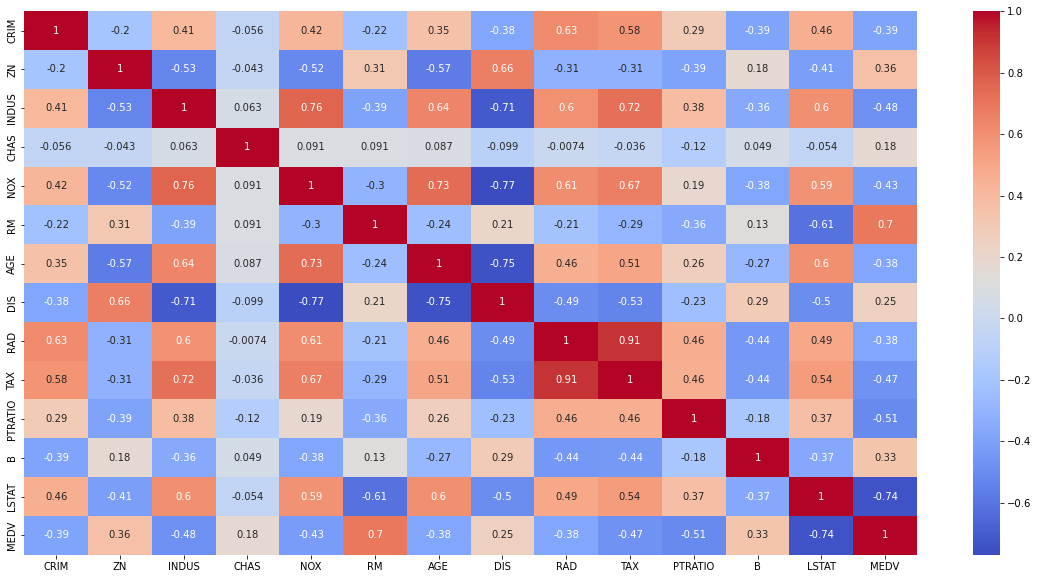

In [14]:
corr = data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap="coolwarm")

<AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>

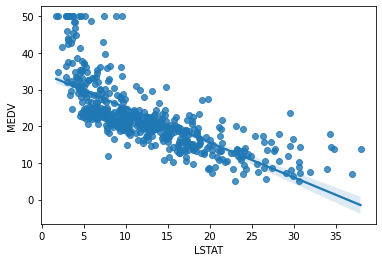

In [15]:
sns.regplot(y=data['MEDV'],x=data['LSTAT']) # scatter plot correlation between MEDV and LSTAT

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

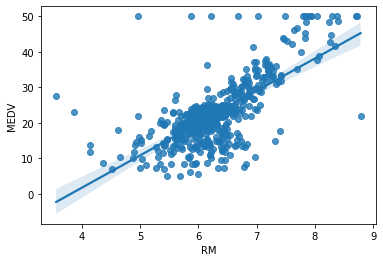

In [16]:
sns.regplot(y=data['MEDV'],x=data['RM'])# scatter plot correlation between MEDV and RM

## 4. Splittng the Data

In [17]:
#train and test split input split
from sklearn.model_selection import cross_val_score, train_test_split
X = data.drop(columns = ['MEDV','RAD'],axis=1)
y = data['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=2)

# shape of spiltted data
print("The shape of X_train :",X_train.shape)
print("The shape ofX_test :",X_test.shape)
print("The shape of y_train :",y_train.shape)
print("The shape of y_test :",y_test.shape)

The shape of X_train : (404, 12)
The shape ofX_test : (102, 12)
The shape of y_train : (404,)
The shape of y_test : (102,)


## 5. Models Building and Testing

#### Linear Regression

In [18]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
#model training
def train(model,X,y):
    X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=2)
    model.fit(X_train,y_train)
    
    
    #prediction of the model
    pred = model.predict(X_test)
    
    #perform cross validation
    cv_score = cross_val_score(model,X,y,scoring='neg_mean_squared_error',cv=5)
    cv_score = np.abs(np.mean(cv_score))
    
    # Calculate accuracy score (R^2 score)
    r2 = r2_score(y_test, pred)
    
    print("model report: ")
    print("MSE:",mean_squared_error(y_test,pred))
    print("CV Score",cv_score)
    print("R^2 Score:", r2)

model report: 
MSE: 18.49563450781735
CV Score 35.58136621076921
R^2 Score: 0.7789181825925793


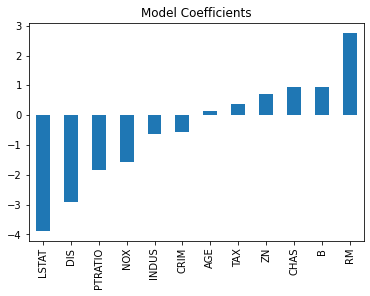

In [19]:
# Create the pipeline with StandardScaler and LinearRegression
model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

# Train the model
train(model, X, y)

# Extract the linear regression model from the pipeline
linear_model = model.named_steps['linearregression']
coef = pd.Series(linear_model.coef_, X.columns).sort_values()

# Plot the model coefficients
coef.plot(kind='bar', title='Model Coefficients')
plt.show()

#### Decision Tree model

In [20]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor 
dtr = DecisionTreeRegressor(max_depth=5)

# Fit the model on Training dataset
dtr.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5)

Accuracy of Decision Tree Regressor is :83.12  %


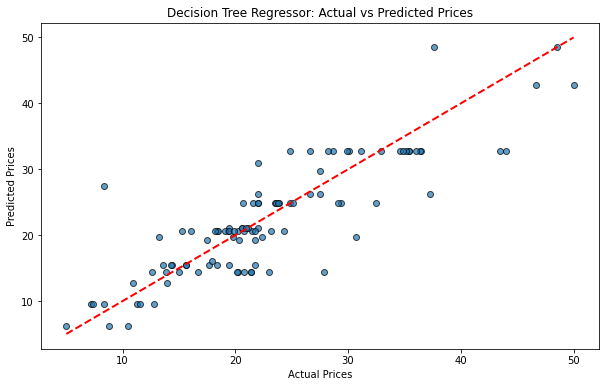

Mean Squared Error (MSE): 22.4033819869855
R^2 Score: 0.7322081378899434


In [21]:
# Predictions of  decision Tree Regressor on Testing Data
y_pred_dtr=dtr.predict(X_test)

# Accuracy Score of Model
from sklearn.metrics import mean_absolute_percentage_error
error = mean_absolute_percentage_error(y_pred_dtr,y_test)

print("Accuracy of Decision Tree Regressor is :%.2f "%((1 - error)*100),'%')

# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_dtr, edgecolor='k', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Decision Tree Regressor: Actual vs Predicted Prices')
plt.show()

# Additional metrics
mse = mean_squared_error(y_test, y_pred_dtr)
r2 = r2_score(y_test, y_pred_dtr)
print("Mean Squared Error (MSE):", mse)
print("R^2 Score:", r2)

#### Ridge Regression Model

In [22]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Ridge(alpha=3.8, fit_intercept=True))
]

ridge_pipe = Pipeline(steps)
ridge_pipe.fit(X_train, y_train)

Pipeline(steps=[('scalar', StandardScaler()), ('poly', PolynomialFeatures()),
                ('model', Ridge(alpha=3.8))])

CV:  0.7997184400226688
R2_score (train):  0.9120705037370247
R2_score (test):  0.9135976833662439
RMSE:  2.6885665922483173


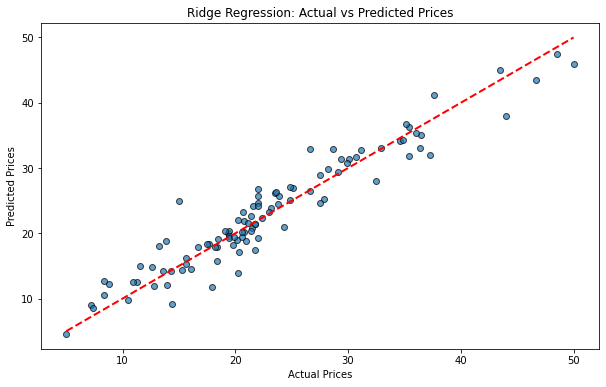

In [23]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score the Test set results
cv_ridge = cross_val_score(estimator = ridge_pipe, X = X_train, y = y_train.ravel(), cv = 10)

# Predicting R2 Score the Test set results
y_pred_ridge_train = ridge_pipe.predict(X_train)
r2_score_ridge_train = r2_score(y_train, y_pred_ridge_train)

# Predicting R2 Score the Test set results
y_pred_ridge_test = ridge_pipe.predict(X_test)
r2_score_ridge_test = r2_score(y_test, y_pred_ridge_test)

# Predicting RMSE the Test set results
rmse_ridge = (np.sqrt(mean_squared_error(y_test, y_pred_ridge_test)))
print('CV: ', cv_ridge.mean())
print('R2_score (train): ', r2_score_ridge_train)
print('R2_score (test): ', r2_score_ridge_test)
print("RMSE: ", rmse_ridge)

# Plot actual vs predicted prices for the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ridge_test, edgecolor='k', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Ridge Regression: Actual vs Predicted Prices')
plt.show()

#### Random Forest model

In [24]:
# Random Forest Regressor 
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_depth = 10, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 200)

# Fit the model on Training datset
rfr.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, n_estimators=200)

Accuracy of Random Forest Regressor is :90.05  %


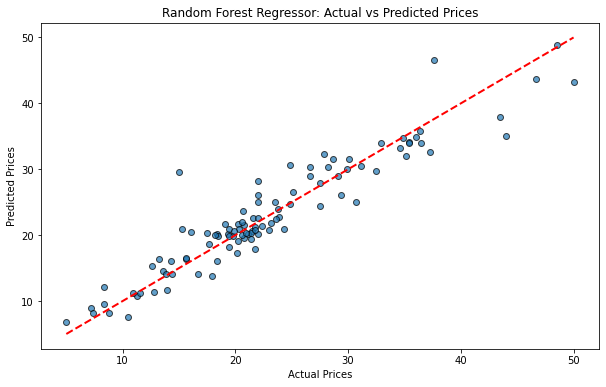

Mean Squared Error (MSE): 9.484778322549191
R^2 Score: 0.8866266508256636


In [25]:
# Predictions of  Ranforest Forest Regressor on Testing Data
y_pred_rfr = rfr.predict(X_test)

# Accuracy Score of Model
error = mean_absolute_percentage_error(y_pred_rfr,y_test)
print("Accuracy of Random Forest Regressor is :%.2f "%((1 - error)*100),'%')

# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rfr, edgecolor='k', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Random Forest Regressor: Actual vs Predicted Prices')
plt.show()

# Additional metrics
mse = mean_squared_error(y_test, y_pred_rfr)
r2 = r2_score(y_test, y_pred_rfr)
print("Mean Squared Error (MSE):", mse)
print("R^2 Score:", r2)

### BEST MODEL
#### Ridge Regression Model with Accuracy - 91% 

## Thank You